# Image Generation with ControlNet

In [ ]:
import base64
import requests
import json
from google.colab import userdata

In [ ]:
def generate_image_with_runware(positive_prompt,
                                negative_prompt,
                                control_image,
                                width=960, height=640, # output image dimensions
                                model="civitai:133005@782002", # Juggernaut XL
                                number_results=1):

    url = "https://api.runware.ai/v1"

    # Create the payload
    payload = [
        {
            "taskType": "authentication",
            "apiKey": userdata.get('runware_key')
        },
        {
            "taskType": "imageInference",
            "taskUUID": "39d7207a-87ef-4c93-8082-1431f9c1dc97",
            "positivePrompt": positive_prompt,
            "negativePrompt": negative_prompt,
            "width": width,
            "height": height,
            "steps": 40,
            "CFGScale": 4,
            "model": model,
            "numberResults": number_results,
            "includeCost": True,
            "controlNet": [{"model": "runware:20@1",
                           "guideImage": "data:image/png;base64,"+control_image,
                           "startStep": 3,
                           "endStep": 20,
                           "controlMode": "controlnet"
                           }]
        }
    ]

    # Set headers
    headers = {
        "Content-Type": "application/json"
    }

    # Make the POST request
    response = requests.post(url, headers=headers, data=json.dumps(payload))

    # Check if the request was successful
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        print(response.text)
        return None

# Convert image to Base 64 string

In [ ]:
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        base64_string = base64.b64encode(image_file.read()).decode("utf-8")
    return base64_string

In [ ]:
image_path = "shoes-1-canny-edge.jpg"
control_image_base64_str = image_to_base64(image_path)

# Generate image with Juggernaut XL and ControlNet

In [ ]:
pos_prompt = """
3 shoes placed on Stairs, outdoors, photography,
canvas shoes, stylish shoe design, realistic
"""

neg_prompt = """
(worst quality, low quality, normal quality, lowres, low details,
oversaturated, undersaturated, overexposed, underexposed, grayscale,
bad photo, bad photography:1.4)
"""

result = generate_image_with_runware(positive_prompt = pos_prompt,
                                     negative_prompt = neg_prompt,
                                     control_image = control_image_base64_str)

# Display result

In [ ]:
result

{'data': [{'taskType': 'imageInference',
   'imageUUID': '7769e484-2518-4cf6-852b-e2e80ed45f12',
   'taskUUID': '39d7207a-87ef-4c93-8082-1431f9c1dc97',
   'cost': 0.0032,
   'seed': 7848027588092062939,
   'imageURL': 'https://im.runware.ai/image/ws/2/ii/7769e484-2518-4cf6-852b-e2e80ed45f12.jpg'}]}

In [ ]:
result['data'][0]['imageURL']

'https://im.runware.ai/image/ws/2/ii/7769e484-2518-4cf6-852b-e2e80ed45f12.jpg'

In [ ]:
from PIL import Image
from io import BytesIO

In [ ]:
response = requests.get(result['data'][0]['imageURL'])
output = Image.open(BytesIO(response.content))

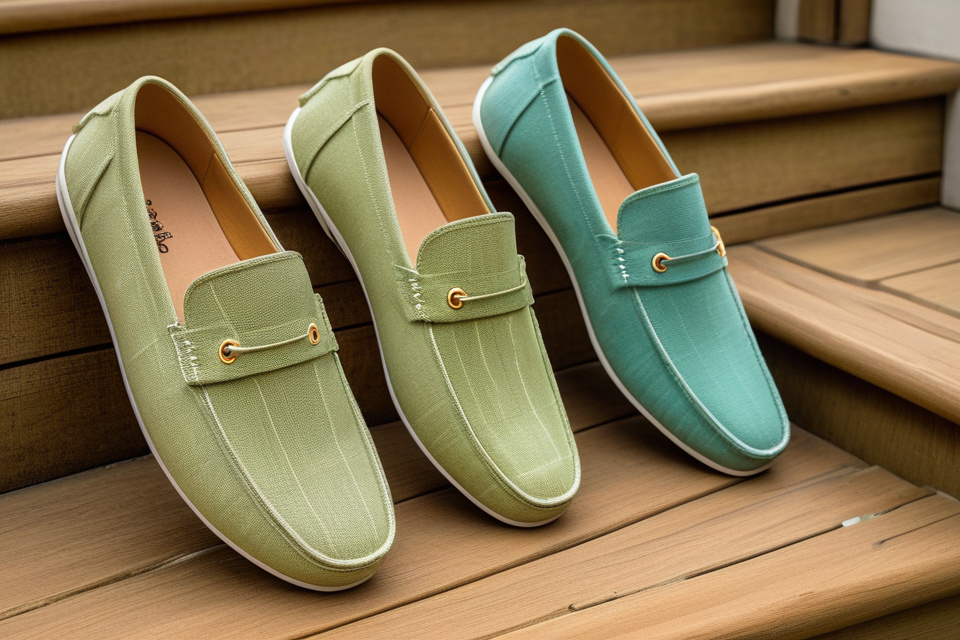

In [ ]:
output